<a href="https://colab.research.google.com/github/Cleverson-Andrade/agricultural-yield-ml-analysis/blob/main/notebooks/crop_yield_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Análise e Previsão de Produtividade Agrícola com Machine Learning

Este projeto tem como objetivo analisar dados agrícolas históricos e construir um modelo de Machine Learning capaz de **prever a produtividade agrícola** com base em fatores como clima, uso de fertilizantes, pesticidas, área cultivada, cultura e localização.

O projeto simula um **cenário real de trabalho em ciência de dados no setor agrícola**, seguindo boas práticas utilizadas em ambientes corporativos.


## 🎯 Objetivo do Projeto

- Realizar análise exploratória dos dados agrícolas
- Preparar os dados para uso em Machine Learning
- Construir um modelo preditivo de regressão
- Avaliar o desempenho do modelo
- Interpretar os resultados e identificar fatores de maior impacto na produtividade


## 📦 Importação das Bibliotecas

Nesta etapa, importamos as bibliotecas necessárias para:
- Manipulação e análise de dados
- Visualização gráfica
- Construção e avaliação de modelos de Machine Learning


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Carregamento do Conjunto de Dados

O dataset utilizado contém informações sobre produção agrícola em diferentes regiões, culturas e condições climáticas.  
Os dados foram carregados diretamente para o ambiente do Google Colab.


In [120]:
df = pd.read_csv('../data/crop_yield_india.csv')

##  Visualização Inicial dos Dados

Visualizamos as primeiras linhas do dataset para entender:
- Estrutura das colunas
- Tipos de dados
- Exemplos de registros


In [121]:

df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


## 🧬 Estrutura e Tipos de Dados

Aqui analisamos:
- Quantidade de registros
- Tipos de dados por coluna
- Presença de valores nulos


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


## 📈 Estatísticas Descritivas

Esta etapa fornece uma visão geral dos dados numéricos, incluindo:
- Média
- Mediana
- Desvio padrão
- Valores mínimos e máximos

Essas informações ajudam a identificar possíveis outliers ou valores inconsistentes.


In [123]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


## 🏷️ Análise das Variáveis Categóricas

Nesta etapa identificamos:
- Quantidade de categorias por variável
- Complexidade dos dados categóricos
- Necessidade de codificação para Machine Learning


In [124]:
df.select_dtypes(include='object').nunique()

,0
Crop,55
Season,6
State,30


In [125]:
df_work = df.copy()

## ✏️ Padronização dos Nomes das Colunas

Para facilitar a leitura e o entendimento do projeto, as colunas foram renomeadas para o português, mantendo clareza sem comprometer a integridade dos dados.


In [126]:
df_work = df_work.rename(columns={
    'Crop': 'cultura',
    'Crop_Year': 'ano',
    'Season': 'estacao',
    'State': 'estado',
    'Area': 'area_hectares',
    'Production': 'producao',
    'Annual_Rainfall': 'chuva_anual',
    'Fertilizer': 'fertilizante',
    'Pesticide': 'pesticida',
    'Yield': 'produtividade'
})


In [127]:
df_work.head()

,cultura,ano,estacao,estado,area_hectares,producao,chuva_anual,fertilizante,pesticida,produtividade
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [128]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cultura        19689 non-null  object 
 1   ano            19689 non-null  int64  
 2   estacao        19689 non-null  object 
 3   estado         19689 non-null  object 
 4   area_hectares  19689 non-null  float64
 5   producao       19689 non-null  int64  
 6   chuva_anual    19689 non-null  float64
 7   fertilizante   19689 non-null  float64
 8   pesticida      19689 non-null  float64
 9   produtividade  19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


## 🔀 Separação das Variáveis Explicativas e da Variável Alvo

- `X`: Variáveis explicativas (features)
- `y`: Variável alvo (produtividade agrícola)

Essa separação é essencial para o treinamento de modelos de Machine Learning.


In [129]:
y = df_work['produtividade']

In [130]:
x = df_work.drop(columns=['produtividade'])

In [131]:
x.head()

,cultura,ano,estacao,estado,area_hectares,producao,chuva_anual,fertilizante,pesticida
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09


In [132]:
y.head()

,produtividade
0,0.796087
1,0.710435
2,0.238333
3,5238.051739
4,0.420909


## 🔢 Codificação das Variáveis Categóricas

Como modelos de Machine Learning não trabalham diretamente com texto, as variáveis categóricas foram convertidas em variáveis numéricas utilizando **One-Hot Encoding**.


In [133]:
x_encoded = pd.get_dummies(x, columns=['cultura', 'estado', 'estacao'], drop_first=True)

In [134]:
x_encoded.shape

(19689, 94)

In [135]:
x_encoded.head()


,ano,area_hectares,producao,chuva_anual,fertilizante,pesticida,cultura_Arhar/Tur,cultura_Bajra,cultura_Banana,cultura_Barley,...,estado_Telangana,estado_Tripura,estado_Uttar Pradesh,estado_Uttarakhand,estado_West Bengal,estacao_Kharif,estacao_Rabi,estacao_Summer,estacao_Whole Year,estacao_Winter
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1997,6637.0,4685,2051.4,631643.29,2057.47,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1997,796.0,22,2051.4,75755.32,246.76,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1997,1739.0,794,2051.4,165500.63,539.09,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [136]:
x.isna().sum().sort_values(ascending=False).head(10)


,0
cultura,0
ano,0
estacao,0
estado,0
area_hectares,0
producao,0
chuva_anual,0
fertilizante,0
pesticida,0


## ✅ Verificação dos Tipos de Dados

Garantimos que todas as variáveis estejam em formato numérico, condição necessária para o treinamento do modelo.


In [137]:
x.dtypes.value_counts()


,count
float64,4
object,3
int64,2


In [138]:
x.select_dtypes(include='object').columns

Index(['cultura', 'estacao', 'estado'], dtype='object')

In [139]:
x = pd.get_dummies(x, columns=['cultura', 'estacao', 'estado'], drop_first=True)


In [140]:
x.dtypes.value_counts()


,count
bool,88
float64,4
int64,2


In [141]:
x = x.astype(int)


In [142]:
x.dtypes.value_counts()


,count
int64,94


## 🧪 Divisão dos Dados em Treino e Teste

Os dados foram divididos em:
- Conjunto de treino (80%)
- Conjunto de teste (20%)

Isso permite avaliar a capacidade de generalização do modelo.


In [143]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split (x, y, test_size=0.2, random_state=42)

In [144]:
x_treino.shape, x_teste.shape

((15751, 94), (3938, 94))

In [145]:
from sklearn.linear_model import LinearRegression

## 🤖 Treinamento do Modelo de Regressão Linear

A Regressão Linear foi utilizada como modelo base (baseline) devido à sua simplicidade e alta interpretabilidade.


In [146]:
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

LinearRegression()

## 🔮 Geração de Previsões

O modelo treinado é aplicado ao conjunto de teste para gerar previsões de produtividade agrícola.


In [147]:
y_pred = modelo.predict(x_teste)

## 📊 Avaliação do Desempenho do Modelo

O desempenho do modelo é avaliado utilizando:
- MAE (Erro Médio Absoluto)
- RMSE (Raiz do Erro Quadrático Médio)
- R² (Coeficiente de Determinação)


In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_teste, y_pred)

mae, rmse, r2

(62.98004087944467, 398.0727512633411, 0.8022291173486165)

## 🧠 Interpretabilidade do Modelo

A análise dos coeficientes permite identificar quais variáveis possuem maior impacto positivo ou negativo na produtividade agrícola.


In [149]:

coeficientes = pd.DataFrame({
    'variavel': x.columns,
    'coeficiente': modelo.coef_
})

coeficientes.head()

,variavel,coeficiente
0,ano,1.023752e+00
1,area_hectares,-8.623845e-06
2,producao,-1.704361e-07
3,chuva_anual,6.496750e-03
4,fertilizante,6.162547e-09


In [150]:
coeficientes['impacto_absoluto'] = coeficientes['coeficiente'].abs()

coeficientes_ordenados = coeficientes.sort_values(
    by='impacto_absoluto',
    ascending=False
)

coeficientes_ordenados.head(10)


,variavel,coeficiente,impacto_absoluto
14,cultura_Coconut,8926.293837,8926.293837
70,estado_Goa,-266.113992,266.113992
77,estado_Kerala,-155.698530,155.698530
66,estado_Assam,-110.136107,110.136107
68,estado_Chhattisgarh,-109.295255,109.295255
82,estado_Mizoram,-81.704902,81.704902
76,estado_Karnataka,-75.244174,75.244174
63,estacao_Whole Year,67.734251,67.734251
81,estado_Meghalaya,-66.474525,66.474525
65,estado_Arunachal Pradesh,-66.154606,66.154606


In [151]:
top10_plot = top10.copy()

top10_plot['variavel_legivel'] = (
    top10_plot['variavel']
    .str.replace('cultura_', 'Cultura: ')
    .str.replace('estado_', 'Estado: ')
    .str.replace('estacao_', 'Estação: ')
)


In [152]:
top10_plot.head()


,variavel,coeficiente,impacto_absoluto,variavel_legivel
14,cultura_Coconut,8926.293837,8926.293837,Cultura: Coconut
70,estado_Goa,-266.113992,266.113992,Estado: Goa
77,estado_Kerala,-155.698530,155.698530,Estado: Kerala
66,estado_Assam,-110.136107,110.136107,Estado: Assam
68,estado_Chhattisgarh,-109.295255,109.295255,Estado: Chhattisgarh


## 📉 Variáveis com Maior Impacto na Produtividade

O gráfico abaixo apresenta as variáveis que exercem maior influência sobre a produtividade agrícola segundo o modelo.


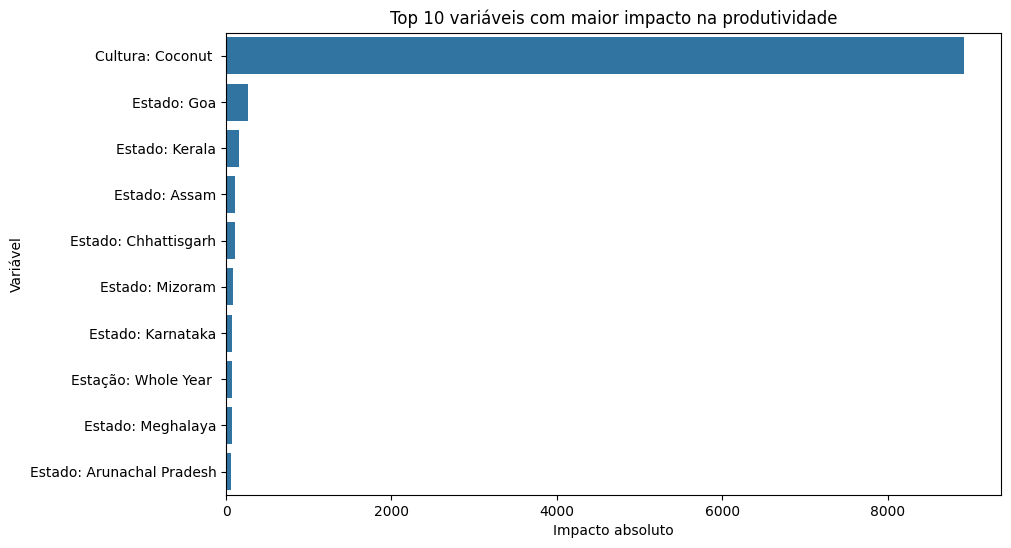

In [153]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='impacto_absoluto',
    y='variavel_legivel',
    data=top10_plot
)
plt.title('Top 10 variáveis com maior impacto na produtividade')
plt.xlabel('Impacto absoluto')
plt.ylabel('Variável')
plt.show()


## 📌 Comparação entre Valores Reais e Previstos

Este gráfico compara os valores reais de produtividade com os valores previstos pelo modelo, permitindo avaliar visualmente sua performance.


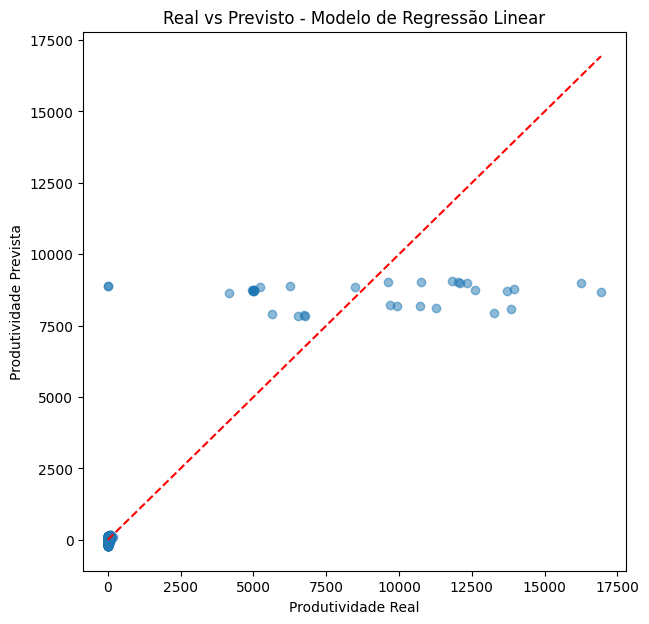

In [155]:
plt.figure(figsize=(7, 7))
plt.scatter(y_teste, y_pred, alpha=0.5)
plt.plot(
    [y_teste.min(), y_teste.max()],
    [y_teste.min(), y_teste.max()],
    color='red',
    linestyle='--'
)
plt.xlabel('Produtividade Real')
plt.ylabel('Produtividade Prevista')
plt.title('Real vs Previsto - Modelo de Regressão Linear')
plt.show()


## 🏁 Conclusão

O modelo de Regressão Linear apresentou um bom desempenho, explicando aproximadamente 80% da variabilidade da produtividade agrícola.

Os resultados indicam que fatores como cultura, localização e condições climáticas exercem impacto significativo na produção agrícola, reforçando o potencial do uso de ciência de dados no agronegócio.
